### Setting up the environment:

In [2]:
#1# Importing libraries: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

RSEED=42

#2# Visualizing the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import json
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Exploring the data:

In [3]:
df_fraud = pd.read_csv('./data/Merge_Frauddet_new.csv')
df_fraud.head()

,ID,invoice_date,tarif_type,counter_number,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,client_catg,region,creation_date,target
0,0,24/03/2014,11,1335667.000,0,8,1,82,0,0,0,4,ELEC,11,101,31/12/1994,0
1,0,29/03/2013,11,1335667.000,0,6,1,1200,184,0,0,4,ELEC,11,101,31/12/1994,0
2,0,23/03/2015,11,1335667.000,0,8,1,123,0,0,0,4,ELEC,11,101,31/12/1994,0
3,0,13/07/2015,11,1335667.000,0,8,1,102,0,0,0,4,ELEC,11,101,31/12/1994,0
4,0,17/11/2016,11,1335667.000,0,9,1,572,0,0,0,12,ELEC,11,101,31/12/1994,0


In [4]:
df_fraud.describe()

,ID,tarif_type,counter_number,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,region,target
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,103836.467,20.136,120919976164.004,0.042,7.315,1.000,409.745,107.568,20.413,54.060,46.322,11.987,209.995,0.767
std,32065.556,13.482,1646702365322.078,0.375,1.360,0.083,588.275,1169.328,163.644,979.218,2594.754,6.159,103.552,2.661
min,0.000,8.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,1.000,11.000,101.000,0.000
25%,104718.000,11.000,121473.000,0.000,6.000,1.000,79.000,0.000,0.000,0.000,4.000,11.000,103.000,0.000
50%,112518.000,11.000,490475.000,0.000,6.000,1.000,272.000,0.000,0.000,0.000,4.000,11.000,301.000,0.000
75%,120486.000,40.000,1112725.000,0.000,9.000,1.000,601.000,0.000,0.000,0.000,4.000,11.000,308.000,0.000
max,128439.000,45.000,27381100000000.000,5.000,9.000,50.000,98889.000,819886.000,45360.000,343568.000,294406.000,51.000,399.000,10.000


In [5]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1048575 non-null  int64  
 1   invoice_date          1048575 non-null  object 
 2   tarif_type            1048575 non-null  int64  
 3   counter_number        1048575 non-null  float64
 4   counter_statue        1048575 non-null  int64  
 5   reading_remarque      1048575 non-null  int64  
 6   counter_coefficient   1048575 non-null  int64  
 7   consommation_level_1  1048575 non-null  int64  
 8   consommation_level_2  1048575 non-null  int64  
 9   consommation_level_3  1048575 non-null  int64  
 10  consommation_level_4  1048575 non-null  int64  
 11  months_number         1048575 non-null  int64  
 12  counter_type          1048575 non-null  object 
 13  client_catg           1048575 non-null  int64  
 14  region                1048575 non-

### Adjusting the data: 

In [6]:
#1# Getting the Dummies for X_train: 

categorical_columns= ['counter_statue', 'reading_remarque','client_catg']
df_fraud_dummy = pd.get_dummies(df_fraud, columns=categorical_columns, drop_first=True, dtype=int)
df_fraud_dummy

,ID,invoice_date,tarif_type,counter_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,...,counter_statue_1,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51
0,0,24/03/2014,11,1335667.000,1,82,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
1,0,29/03/2013,11,1335667.000,1,1200,184,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,0,23/03/2015,11,1335667.000,1,123,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
3,0,13/07/2015,11,1335667.000,1,102,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
4,0,17/11/2016,11,1335667.000,1,572,0,0,0,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,128439,26/06/2007,40,42475.000,1,106,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1048571,128439,24/10/2007,11,464740.000,1,476,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1048572,128439,06/05/2015,40,42475.000,1,63,0,0,0,4,...,0,0,0,0,0,0,1,0,0,0
1048573,128439,06/05/2015,11,464740.000,1,459,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0


In [7]:
#2# Checking for missing values: According with the documentation, the data has no NaN values:

df_fraud_dummy.isnull().sum()

# The Data is complete. 

ID                      0
invoice_date            0
tarif_type              0
counter_number          0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
months_number           0
counter_type            0
region                  0
creation_date           0
target                  0
counter_statue_1        0
counter_statue_2        0
counter_statue_3        0
counter_statue_4        0
counter_statue_5        0
reading_remarque_7      0
reading_remarque_8      0
reading_remarque_9      0
client_catg_12          0
client_catg_51          0
dtype: int64

In [8]:
# possible baseline models
# coefficient vs which consumption level the client is 
##

In [9]:
#2# Adjusting the data type:

#A# Changed the type of the categorical data from int64 to categorical:
df_fraud_dummy= df_fraud_dummy.astype({"reading_remarque_7": "category", "reading_remarque_9": "category", "reading_remarque_8": "category", "client_catg_51": "category", "client_catg_12": "category", "counter_statue_1": "category","counter_statue_2": "category","counter_statue_3": "category","counter_statue_4": "category","counter_statue_5": "category", "counter_type": 'category', 'target': 'category'})

#B# # Changed invoice_date and creation_date to date formate:
df_fraud_dummy['invoice_date'] = pd.to_datetime(df_fraud_dummy['invoice_date'])
df_fraud_dummy['creation_date'] = pd.to_datetime(df_fraud_dummy['creation_date'])
df_fraud_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1048575 non-null  int64         
 1   invoice_date          1048575 non-null  datetime64[ns]
 2   tarif_type            1048575 non-null  int64         
 3   counter_number        1048575 non-null  float64       
 4   counter_coefficient   1048575 non-null  int64         
 5   consommation_level_1  1048575 non-null  int64         
 6   consommation_level_2  1048575 non-null  int64         
 7   consommation_level_3  1048575 non-null  int64         
 8   consommation_level_4  1048575 non-null  int64         
 9   months_number         1048575 non-null  int64         
 10  counter_type          1048575 non-null  category      
 11  region                1048575 non-null  int64         
 12  creation_date         1048575 non-null  da

In [10]:
# changed value target from 10 to 1:
df_fraud_dummy["target"].replace(10, 1, inplace=True)

# changed strings to cate (ELEC= 0 and Gas =1):
df_fraud_dummy["counter_type"].replace("ELEC", 0 ,inplace=True)
df_fraud_dummy["counter_type"].replace("GAZ", 1 ,inplace=True)


In [11]:
#add a new colum with total consumption level:
df_fraud_dummy.eval('sum_consu = consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4',inplace=True)

##### Creating a new data frame for the group work flow: 

In [12]:
df_fraud_dummy = pd.DataFrame(df_fraud_dummy)
folder_path = './data/'
file_path = folder_path + 'df_fraud_dummy.csv'
df_fraud_dummy.to_csv(file_path, index=False)

In [13]:
df_fraud_dummy.columns

Index(['ID', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'months_number',
       'counter_type', 'region', 'creation_date', 'target', 'counter_statue_1',
       'counter_statue_2', 'counter_statue_3', 'counter_statue_4',
       'counter_statue_5', 'reading_remarque_7', 'reading_remarque_8',
       'reading_remarque_9', 'client_catg_12', 'client_catg_51', 'sum_consu'],
      dtype='object')

In [14]:
df_fraud_dummy

,ID,invoice_date,tarif_type,counter_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,...,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51,sum_consu
0,0,2014-03-24,11,1335667.000,1,82,0,0,0,4,...,0,0,0,0,0,1,0,0,0,82
1,0,2013-03-29,11,1335667.000,1,1200,184,0,0,4,...,0,0,0,0,0,0,0,0,0,1384
2,0,2015-03-23,11,1335667.000,1,123,0,0,0,4,...,0,0,0,0,0,1,0,0,0,123
3,0,2015-07-13,11,1335667.000,1,102,0,0,0,4,...,0,0,0,0,0,1,0,0,0,102
4,0,2016-11-17,11,1335667.000,1,572,0,0,0,12,...,0,0,0,0,0,0,1,0,0,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,128439,2007-06-26,40,42475.000,1,106,0,0,0,4,...,0,0,0,0,0,0,0,0,0,106
1048571,128439,2007-10-24,11,464740.000,1,476,0,0,0,4,...,0,0,0,0,0,0,0,0,0,476
1048572,128439,2015-05-06,40,42475.000,1,63,0,0,0,4,...,0,0,0,0,0,1,0,0,0,63
1048573,128439,2015-05-06,11,464740.000,1,459,0,0,0,4,...,0,0,0,0,0,0,1,0,0,459


In [15]:
df_fraud_dummy["ID"].nunique()

31603

<Axes: xlabel='counter_coefficient', ylabel='sum_consu'>

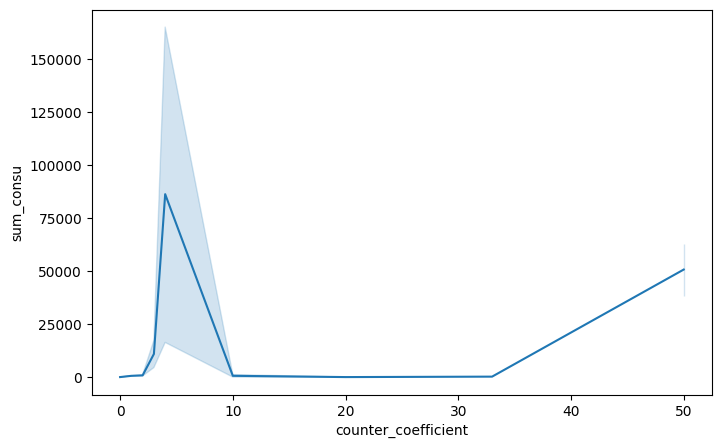

In [16]:
sns.lineplot(data=df_fraud_dummy, x = 'counter_coefficient', y ='sum_consu')

In [17]:
sns.barplot(data=df_fraud_dummy, x="counter_statue", y="sum_consu")

ValueError: Could not interpret input 'counter_statue'

In [ ]:
sns.barplot(data=df_fraud_dummy, x="counter_coefficient", y="sum_consu")

In [ ]:
sns.boxplot(data=df_fraud_dummy, x="counter_coefficient", y="sum_consu")
#  having a very high coefficinet for consumption (10,20,33) while the sum of consumptuion is very low might be a indicator for counter manulatplation 
# using 10 times or more the standard coefficient should lead to at least 5X consumptuion 
 

<Axes: xlabel='region', ylabel='target'>

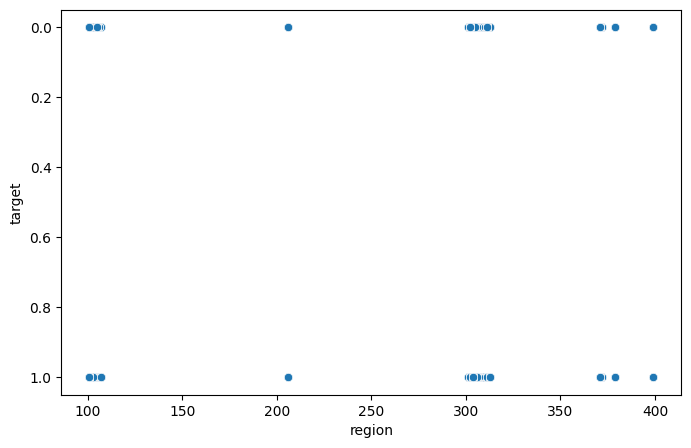

In [18]:
sns.scatterplot(data=df_fraud_dummy, x="region", y="target")

<Axes: xlabel='tarif_type', ylabel='target'>

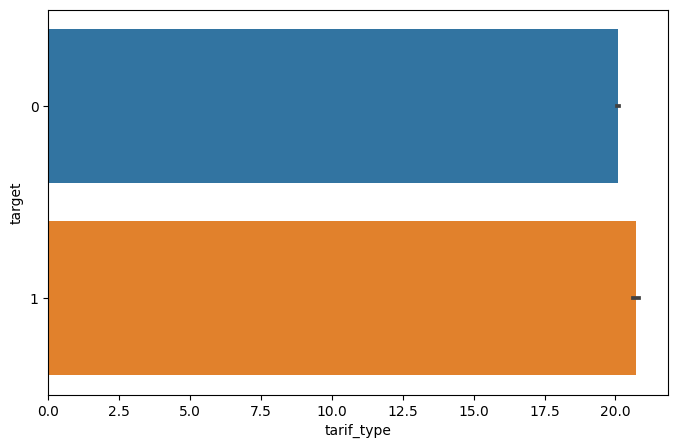

In [19]:
sns.barplot(data=df_fraud_dummy, x="tarif_type", y="target")

<Axes: xlabel='sum_consu', ylabel='target'>

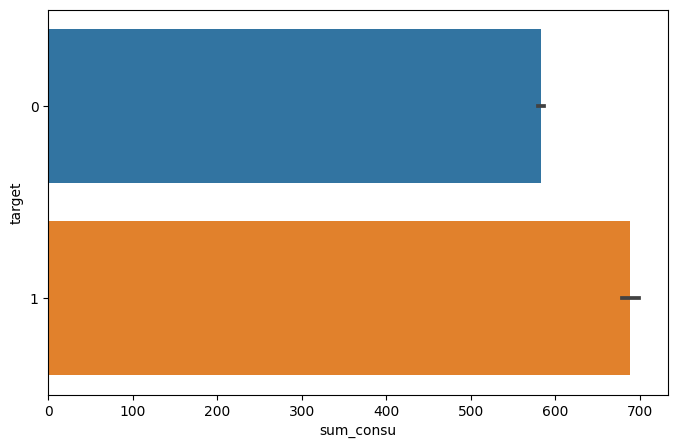

In [20]:
sns.barplot(data=df_fraud_dummy, x="sum_consu", y="target")

<Axes: xlabel='region', ylabel='target'>

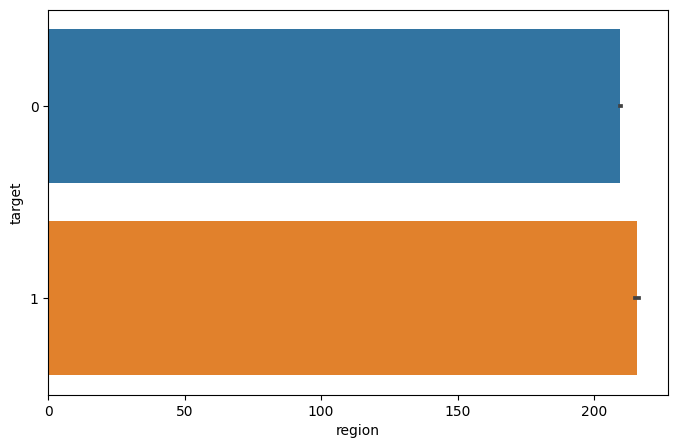

In [23]:
sns.barplot(data=df_fraud_dummy, x="target", y="")

<Axes: xlabel='counter_type', ylabel='target'>

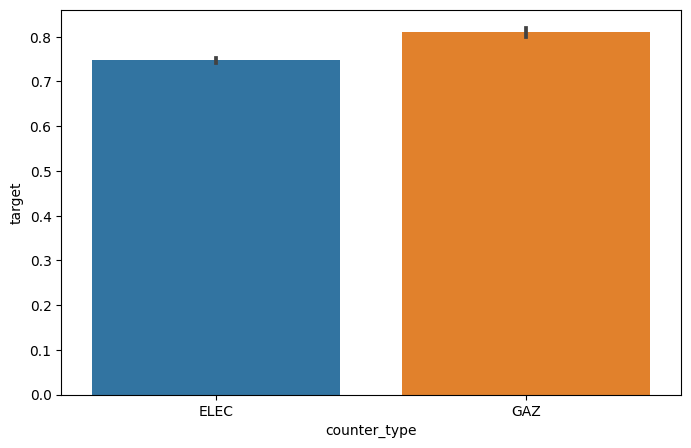

In [26]:
sns.barplot(data=df_fraud, x="counter_type", y="target")

### Spliting the data 

In [ ]:
y = df_fraud_dummy['target']
X = df_fraud_dummy.drop('target', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=y, random_state=RSEED)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (786431, 24)
X_test shape: (262144, 24)
y_train shape: (786431,)
y_test shape: (262144,)


In [ ]:
#1# Checking X: 
X

,ID,invoice_date,tarif_type,counter_number,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,...,counter_statue_2,counter_statue_3,counter_statue_4,counter_statue_5,reading_remarque_7,reading_remarque_8,reading_remarque_9,client_catg_12,client_catg_51,sum_consu
0,0,2014-03-24,11,1335667.000,1,82,0,0,0,4,...,0,0,0,0,0,1,0,0,0,82
1,0,2013-03-29,11,1335667.000,1,1200,184,0,0,4,...,0,0,0,0,0,0,0,0,0,1384
2,0,2015-03-23,11,1335667.000,1,123,0,0,0,4,...,0,0,0,0,0,1,0,0,0,123
3,0,2015-07-13,11,1335667.000,1,102,0,0,0,4,...,0,0,0,0,0,1,0,0,0,102
4,0,2016-11-17,11,1335667.000,1,572,0,0,0,12,...,0,0,0,0,0,0,1,0,0,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,128439,2007-06-26,40,42475.000,1,106,0,0,0,4,...,0,0,0,0,0,0,0,0,0,106
1048571,128439,2007-10-24,11,464740.000,1,476,0,0,0,4,...,0,0,0,0,0,0,0,0,0,476
1048572,128439,2015-05-06,40,42475.000,1,63,0,0,0,4,...,0,0,0,0,0,1,0,0,0,63
1048573,128439,2015-05-06,11,464740.000,1,459,0,0,0,4,...,0,0,0,0,0,0,1,0,0,459
